# Sales Prediction

Importing the dataset

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading and observing the dataset

In [43]:
data=pd.read_csv("advertising.csv")

In [44]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [45]:
data.shape

(200, 4)

In [46]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [47]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [49]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Checking for the null values

In [50]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Exploratary Data Analysis

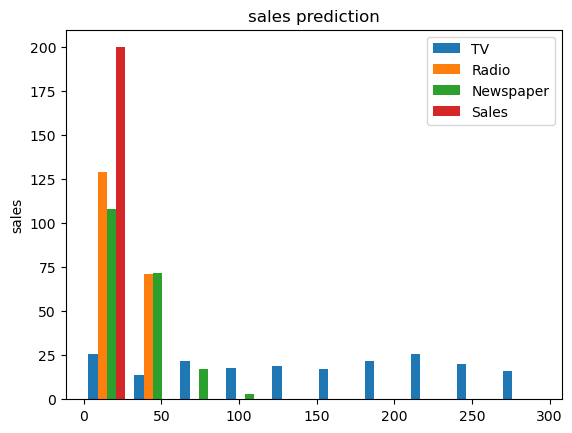

In [51]:
plt.hist(data)
plt.title("sales prediction")
plt.xlabel("")
plt.ylabel("sales")
plt.legend(labels=['TV','Radio','Newspaper','Sales'],loc= 'best')

C:\Users\sruthi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


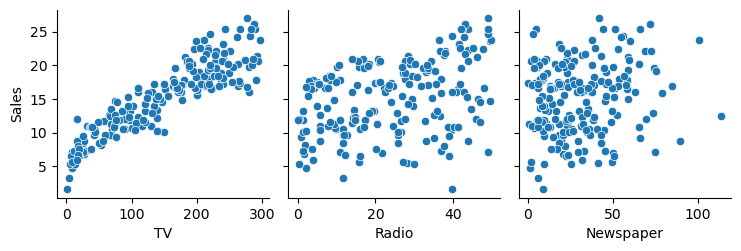

In [52]:
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='scatter')
plt.show()

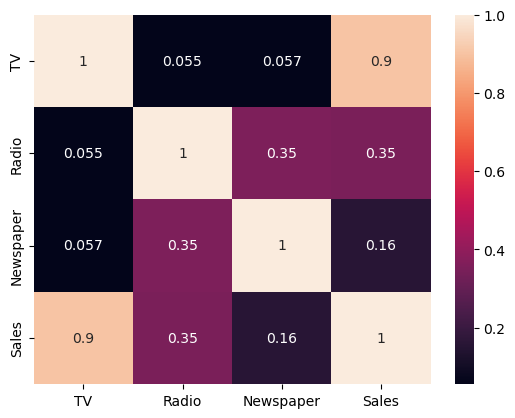

In [53]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [54]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

Splitting the dataset into training and testing dataset

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [56]:
x_train.shape

(140, 3)

In [57]:
x_test.shape

(60, 3)

In [58]:
y_train.shape

(140,)

In [59]:
y_test.shape

(60,)

Training the model with the training dataset

In [60]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,random_state=0)
model.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

Predicting the model using testing dataset

In [61]:
y_pred=model.predict(x_test)
y_pred

array([11.11 , 10.598, 11.459, 25.314, 16.832, 11.608,  9.65 , 17.946,
        8.303, 17.966, 24.938, 11.403, 15.453, 19.051, 11.568, 12.742,
       20.47 ,  7.01 , 13.709, 17.974, 25.226, 11.959, 17.237, 12.505,
       11.076, 14.366, 17.181, 22.282, 16.441,  7.655, 12.272, 23.394,
       20.383, 22.499,  6.344,  6.853, 10.652, 17.521, 12.911,  7.137,
       10.02 ,  7.488, 14.54 , 18.589, 18.514, 13.854,  5.393, 10.486,
       14.55 , 11.544, 11.741, 20.093, 20.172, 19.296, 10.271, 11.05 ,
       20.548, 17.556, 18.496,  6.242])

Model Evaluation

In [62]:
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error(y_test,y_pred)
r2_score(y_test,y_pred)

0.9183171761704089

In [63]:
mean_squared_error(y_test,y_pred)

2.459336183333334

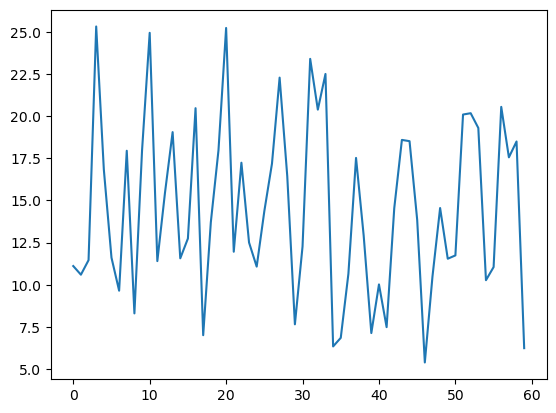

In [64]:
plt.plot(y_pred)

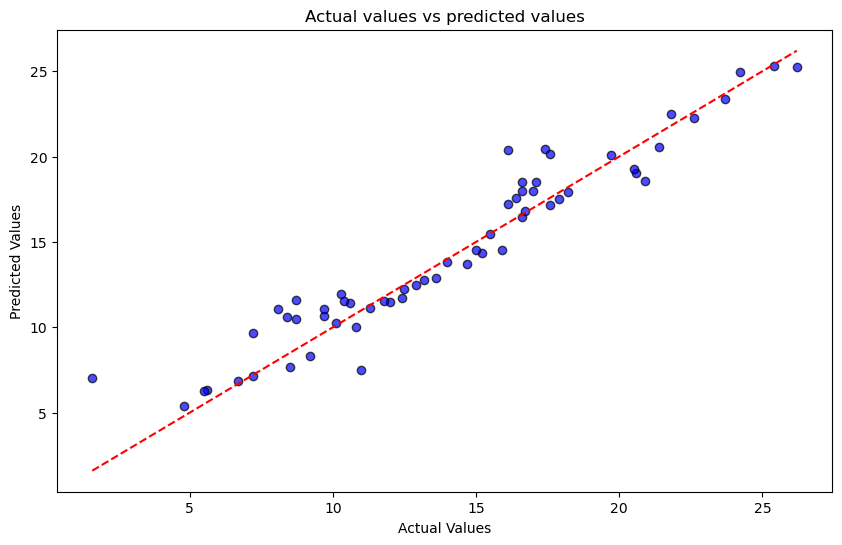

In [65]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,color="blue",edgecolor='k',alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual values vs predicted values")
plt.show()